<a href="https://colab.research.google.com/github/gonzalorodriguezrovira/TFG_SkinAnalizer/blob/main/Codigo/TFG_Evaluaci%C3%B3nResultados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modulos**

In [ ]:
!pip install -q aequitas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.7/259.7 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.1/234.1 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.5/231.5 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Carga de modulos
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from aequitas.group import Group
from aequitas.bias import Bias
from aequitas.fairness import Fairness
from google.colab import drive

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import seaborn as sns; sns.set()
import seaborn as sns
import aequitas.plot as ap

# **Funciones para carga y trato de datase**

In [ ]:
def load_metadata():
  drive.mount('/content/gdrive', force_remount=True)

  df_ISIC=pd.read_csv('/content/gdrive/MyDrive/df_ISIC_MOD.csv')
  df_prediction=pd.read_csv('/content/gdrive/MyDrive/df_prediction.csv')

  # Se cambia el nombre de la columna ya que ambos metadatos
  # tienen una con el mismo nombre pero informaciones distintas
  df_prediction.rename(columns = {'diagnosis':'diagnosis_p'}, inplace = True)

  return df_ISIC,df_prediction

def fusion_data(df_ISIC,df_prediction):
  # Se fusionan ambos dataframes por la columna image_name
  df_total = pd.merge(df_ISIC, df_prediction, on='image_name')
  # Se crea una columna con la predicción en binario
  df_total['prediction_binary'] = np.where(df_total['prediction'] >= 0.5, 1, 0)

  return df_total

# **Funciones para la representación de estadisticas**

In [ ]:
# Función para mostrar la matriz de confusión
def show_confusion_matrix(y_true, y_pred_binary):

    cm = confusion_matrix(y_true, y_pred_binary)
    plt.figure(figsize=(5,5))

    x_axis_labels = ['Benigno', 'Maligno']
    y_axis_labels = ['Benigno', 'Maligno']

    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                linewidths=1, linecolor='black',
                xticklabels=x_axis_labels, yticklabels=y_axis_labels)

    plt.ylabel('Diagnóstico real')
    plt.xlabel('Predicción del modelo')

    print('Verdadero negativo: ', cm[0][0])
    print('Falso positivo: ', cm[0][1])
    print('Falso negativo: ', cm[1][0])
    print('Vardadero positivo: ', cm[1][1])
    print('Tasas de acierto: ', (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[1][0]+cm[0][1]))

def show_precision_sensitivity_curve(y_true, y_pred):

  display = PrecisionRecallDisplay.from_predictions(y_true, y_pred, color='green',
                                                  name="Modelo de diagnóstico");
  display.ax_.set_title("Curva PR");
  display.ax_.set_xlabel("Sensibildad");
  display.ax_.set_ylabel("Precisión");
  display.ax_.get_legend().remove()

# **Resolución**

In [ ]:
df_ISIC,df_prediction=load_metadata()

# Se muestra los tamaños de ambos metadatos
print("Número de registros en fichero de metadatos:", len(df_ISIC))
print("Número de registros en fichero de predicciones del conjunto de datos de prueba:", len(df_prediction))

NameError: name 'load_metadata' is not defined

In [ ]:
# Fusiono los metadatos
df_total=fusion_data(df_ISIC,df_prediction)

In [ ]:
#Se muestra los metadatos
df_total

,image_name,sex,age_approx,anatom_site_general_challenge,diagnosis,age_group,benign_malignant,ITA,diagnosis_p,prediction,prediction_binary
0,ISIC_0000003,male,30.0,upper extremity,NV,"(15, 30]",benign,1.0,0,2.186367e-09,0
1,ISIC_0000015,male,35.0,posterior torso,NV,"(30, 45]",benign,6.0,0,2.510644e-04,0
2,ISIC_0000073,female,20.0,posterior torso,NV,"(15, 30]",benign,5.0,0,6.306997e-06,0
3,ISIC_0000074,male,25.0,lower extremity,MEL,"(15, 30]",malignant,6.0,1,2.292183e-01,0
4,ISIC_0000163,male,60.0,upper extremity,MEL,"(45, 60]",malignant,1.0,1,5.617422e-01,1
...,...,...,...,...,...,...,...,...,...,...,...
3442,ISIC_0073199,male,45.0,palms/soles,NV,"(30, 45]",benign,1.0,0,1.906899e-05,0
3443,ISIC_0073215,male,70.0,head/neck,BCC,"(60, 75]",malignant,1.0,1,9.999981e-01,1
3444,ISIC_0073224,female,55.0,head/neck,AK,"(45, 60]",benign,1.0,0,9.999874e-01,1
3445,ISIC_0073238,female,45.0,upper extremity,MEL,"(30, 45]",malignant,1.0,1,9.999073e-01,1


### Curva PR

In [ ]:
# Diagnóstico real
y_true = list(df_total['diagnosis_p'])
# Diagnóstico predicho (probabilidad)
y_pred = list(df_total['prediction'])
# Diagnóstico predicho (binario)
y_pred_binary = list(df_total['prediction_binary'])

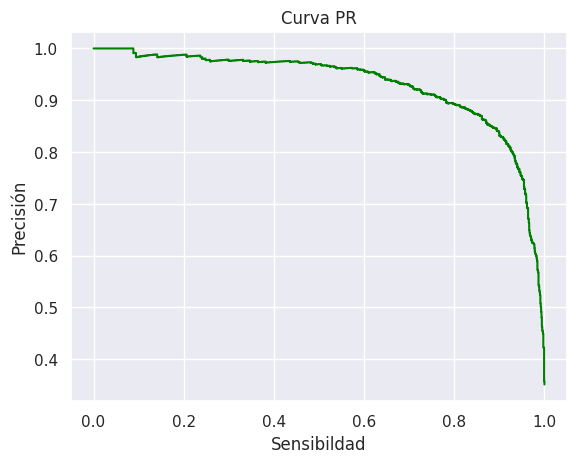

In [ ]:
# Se muestra lacurva Precisión-Sensibilidad
show_precision_sensitivity_curve(y_true, y_pred)

### Matriz de confusión

Verdadero negativo:  2041
Falso positivo:  195
Falso negativo:  136
Vardadero positivo:  1075
Tasas de acierto:  0.9039744705541051


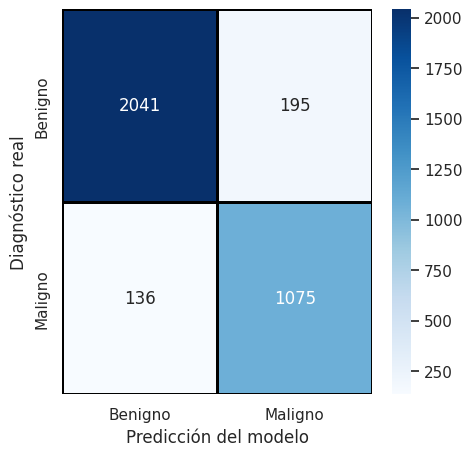

In [ ]:
# Se muestra la matriz de confusion
show_confusion_matrix(y_true, y_pred_binary)

In [ ]:
# Métricas
auc_roc = roc_auc_score(y_true, y_pred)
auc_pr = average_precision_score(y_true, y_pred)
metrics = precision_recall_fscore_support(y_true, y_pred_binary)

print("AUC ROC: {0:.3f}".format(auc_roc))
print("AUC PR: {0:.3f}".format(auc_pr))
print("Precisión:", round(metrics[0][1],3))
print("Sensibilidad:", round(metrics[1][1],3))
print("Puntuación F1:", round(metrics[2][1],3))

AUC ROC: 0.960
AUC PR: 0.931
Precisión: 0.846
Sensibilidad: 0.888
Puntuación F1: 0.867


### Estadisticas falsos negativos

In [ ]:
# Desglose de los falsos negativos
df_fn = df_total[(df_total['diagnosis_p'] == 1) & (df_total['prediction_binary'] == 0)]

print("Numero de MEL falsos negativos",len(df_fn[(df_fn['diagnosis']== 'MEL')]))
print("Numero de BCC falsos negativos",len(df_fn[(df_fn['diagnosis']== 'BCC')]))
print("Numero de SCC falsos negativos",len(df_fn[(df_fn['diagnosis']== 'SCC')]))

Numero de MEL falsos negativos 92
Numero de BCC falsos negativos 28
Numero de SCC falsos negativos 16


In [ ]:
aq_palette = sns.diverging_palette(225, 35, n=2)
by_sex = sns.countplot(x="diagnosis", hue="prediction_binary",
                       data=df_fn,
                       palette=aq_palette)

NameError: name 'df_fn' is not defined

### Estadisticas falsos positivos

In [ ]:
# Desglose de los falsos positivos
df_fp = df_total[(df_total['diagnosis_p'] == 0) & (df_total['prediction_binary'] == 1)]

print("Numero de NV falsos negativos",len(df_fp[(df_fp['diagnosis']== 'NV')]))
print("Numero de AK falsos negativos",len(df_fp[(df_fp['diagnosis']== 'AK')]))
print("Numero de BKL falsos negativos",len(df_fp[(df_fp['diagnosis']== 'BKL')]))
print("Numero de VASC falsos negativos",len(df_fp[(df_fp['diagnosis']== 'VASC')]))
print("Numero de DF falsos negativos",len(df_fp[(df_fp['diagnosis']== 'DF')]))

Numero de NV falsos negativos 53
Numero de AK falsos negativos 38
Numero de BKL falsos negativos 40
Numero de VASC falsos negativos 3
Numero de DF falsos negativos 3


<ipython-input-14-0d13b463a8a8>:2: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  by_sex = sns.countplot(x="diagnosis", hue="prediction_binary",


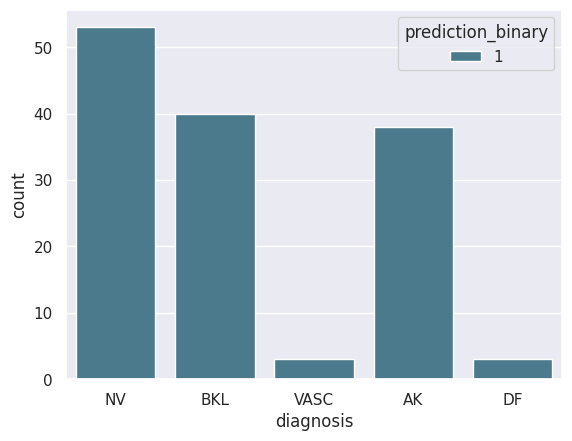

In [ ]:
aq_palette = sns.diverging_palette(225, 35, n=2)
by_sex = sns.countplot(x="diagnosis", hue="prediction_binary",color="green".
                       data=df_fp,
                       palette=aq_palette)

### Estadisticas prediciones del modelo

In [ ]:
# Contiene las predicciones correctas
df_t=df_total[(df_total['diagnosis_p'] == df_total['prediction_binary'])]
# Contiene las predicciones incorrectas
df_f=df_total[(df_total['diagnosis_p'] != df_total['prediction_binary'])]

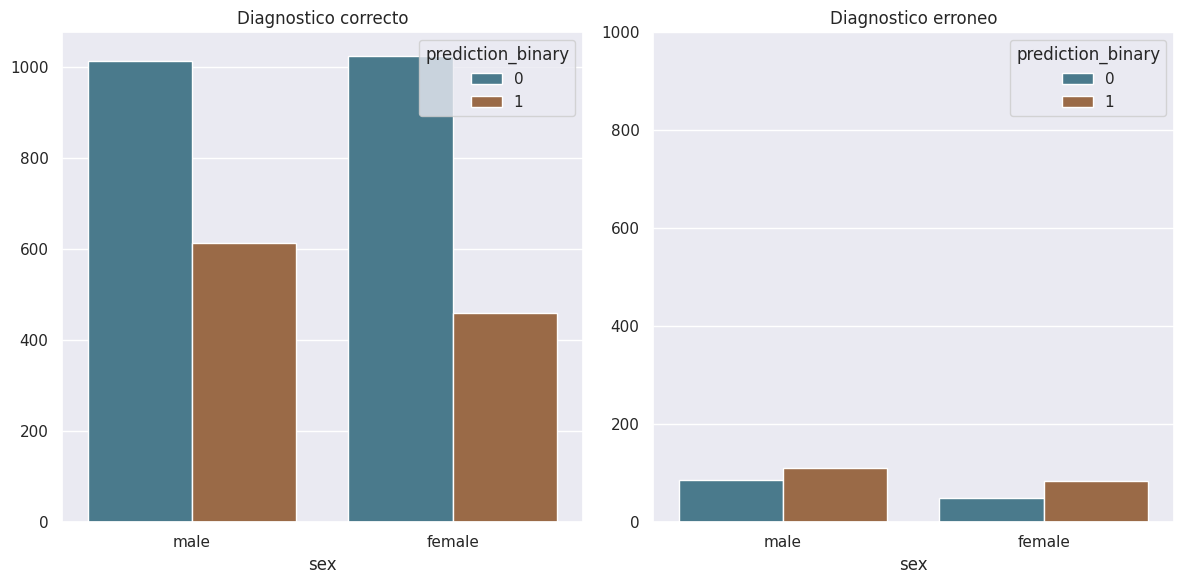

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

plt.sca(axs[0])
sns.countplot(x="sex", hue="prediction_binary", data=df_t, palette=aq_palette)
plt.title('Diagnostico correcto')
plt.ylabel(None)



plt.sca(axs[1])
sns.countplot(x="sex", hue="prediction_binary", data=df_f, palette=aq_palette)
plt.title('Diagnostico erroneo')
plt.ylim(0, 1000)
plt.ylabel(None)



plt.tight_layout()

plt.show()

<ipython-input-21-898620e748df>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_t['age_group'] = pd.Categorical(df_t['age_group'], categories=order, ordered=True)
<ipython-input-21-898620e748df>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f['age_group'] = pd.Categorical(df_f['age_group'], categories=order, ordered=True)


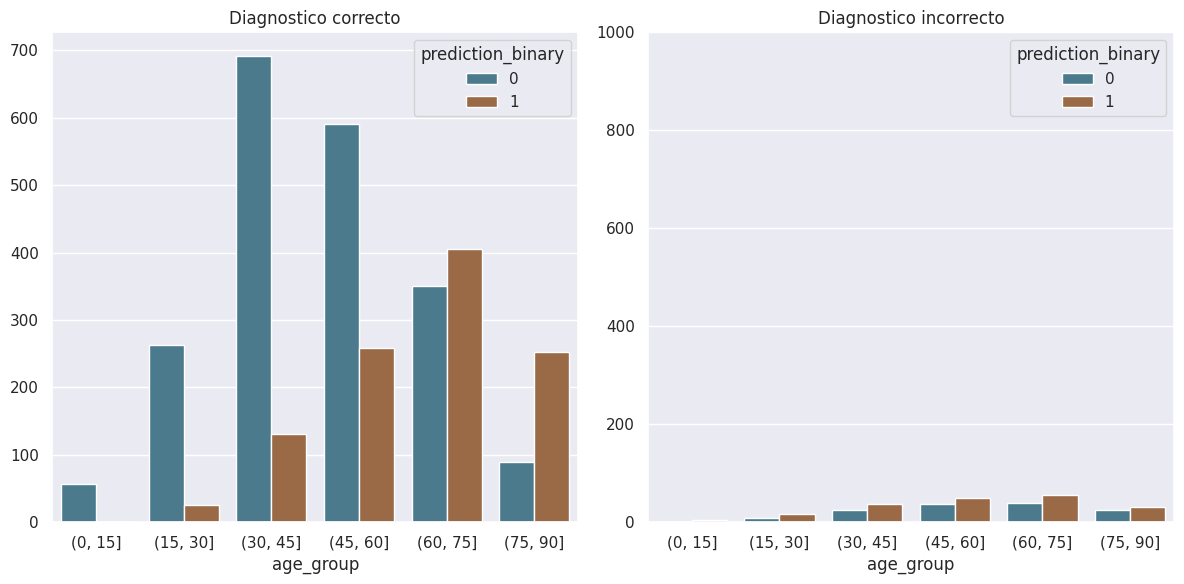

In [ ]:
order = ['(0, 15]', '(15, 30]', '(30, 45]', '(45, 60]', '(60, 75]', '(75, 90]']

# Convertir age_group a tipo categórico con el orden especificado
df_t['age_group'] = pd.Categorical(df_t['age_group'], categories=order, ordered=True)
df_f['age_group'] = pd.Categorical(df_f['age_group'], categories=order, ordered=True)


fig, axs = plt.subplots(1, 2, figsize=(12, 6))

plt.sca(axs[0])
by_age = sns.countplot(x="age_group",
                       hue="prediction_binary",
                       data=df_t,
                       palette=aq_palette)
plt.title('Diagnostico correcto')
plt.ylabel(None)


plt.sca(axs[1])
by_age = sns.countplot(x="age_group",
                       hue="prediction_binary",
                       data=df_f,
                       palette=aq_palette)
plt.title('Diagnostico incorrecto')
plt.ylim(0, 1000)
plt.ylabel(None)




plt.tight_layout()

plt.show()

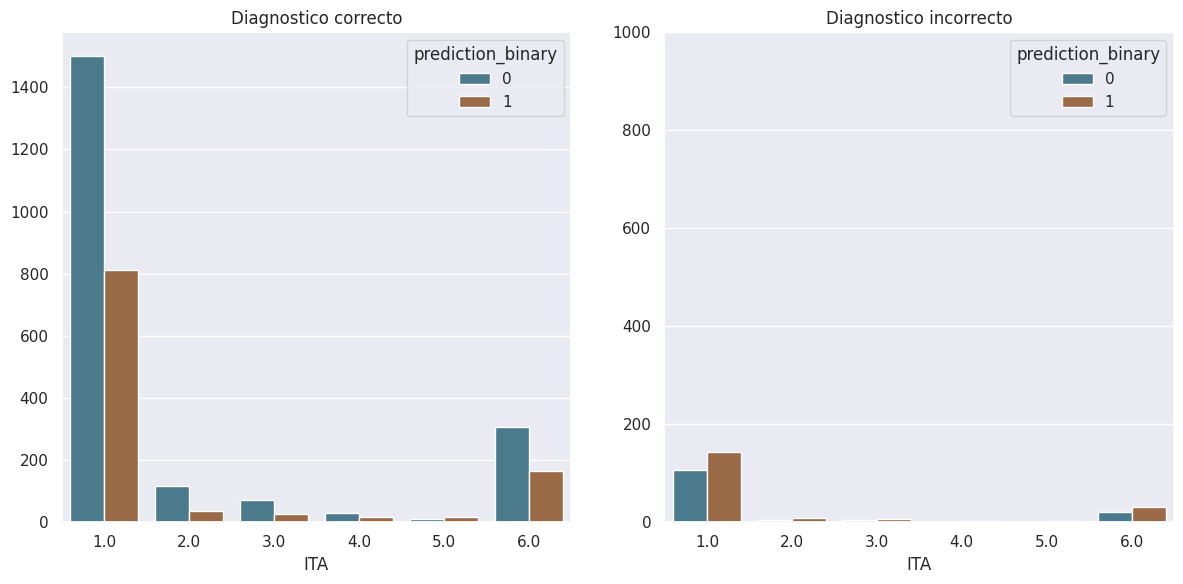

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

plt.sca(axs[0])
by_ITA = sns.countplot(x="ITA",
                       hue="prediction_binary",
                       data=df_t,
                       palette=aq_palette)
plt.title('Diagnostico correcto')
plt.ylabel(None)


plt.sca(axs[1])
by_ITA = sns.countplot(x="ITA",
                       hue="prediction_binary",
                       data=df_f,
                       palette=aq_palette)
plt.title('Diagnostico incorrecto')
plt.ylim(0, 1000)



plt.tight_layout()
plt.ylabel(None)


plt.show()

### Calculo de métricas de equidad

| Metric | Column Name |
| --- | --- |
| True Positive Rate Disparity | 'tpr_disprity' |
| True Negative Rate | 'tnr_disparity' |
| False Omission Rate | 'for_disparity' |
| False Discovery Rate | 'fdr_disparity' |
| False Positive Rate | 'fpr_disparity' |
| False NegativeRate | 'fnr_disparity' |
| Negative Predictive Value | 'npv_disparity' |
| Precision Disparity | 'precision_disparity' |
| Predicted Positive Ratio$_k$ Disparity | 'ppr_disparity' |
| Predicted Positive Ratio$_g$ Disparity | 'pprev_disparity' |

In [ ]:
df_plt=df_total[['sex', 'diagnosis_p', 'age_group', 'ITA', 'prediction_binary']]
df_plt["ITA"] = df_plt["ITA"].astype(str)

df_plt.rename(columns={'diagnosis_p': 'label_value', 'prediction_binary': 'score'}, inplace=True)

df_plt

<ipython-input-27-c0520bd9df2b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plt["ITA"] = df_plt["ITA"].astype(str)
<ipython-input-27-c0520bd9df2b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plt.rename(columns={'diagnosis_p': 'label_value', 'prediction_binary': 'score'}, inplace=True)


,sex,label_value,age_group,ITA,score
0,male,0,"(15, 30]",1.0,0
1,male,0,"(30, 45]",6.0,0
2,female,0,"(15, 30]",5.0,0
3,male,1,"(15, 30]",6.0,0
4,male,1,"(45, 60]",1.0,0
...,...,...,...,...,...
3442,male,0,"(30, 45]",1.0,0
3443,male,1,"(60, 75]",1.0,1
3444,female,0,"(45, 60]",1.0,1
3445,female,1,"(30, 45]",1.0,1


In [ ]:
g = Group()
xtab, _ = g.get_crosstabs(df_plt)
absolute_metrics = g.list_absolute_metrics(xtab)

In [ ]:
data_equity = xtab[['attribute_name', 'attribute_value'] + absolute_metrics].round(2)
data_equity

,attribute_name,attribute_value,accuracy,tpr,tnr,for,fdr,fpr,fnr,npv,precision,ppr,pprev,prev
0,sex,female,0.91,0.85,0.94,0.07,0.14,0.06,0.15,0.93,0.86,0.44,0.31,0.32
1,sex,male,0.89,0.81,0.94,0.11,0.11,0.06,0.19,0.89,0.89,0.56,0.35,0.38
2,age_group,"(0, 15]",0.95,0.00,0.98,0.03,1.00,0.02,1.00,0.97,0.00,0.00,0.02,0.03
3,age_group,"(15, 30]",0.92,0.68,0.95,0.04,0.39,0.05,0.32,0.96,0.61,0.03,0.12,0.11
4,age_group,"(30, 45]",0.94,0.77,0.97,0.05,0.15,0.03,0.23,0.95,0.85,0.12,0.16,0.18
5,age_group,"(45, 60]",0.90,0.80,0.95,0.09,0.13,0.05,0.20,0.91,0.87,0.24,0.29,0.32
6,age_group,"(60, 75]",0.88,0.86,0.89,0.14,0.10,0.11,0.14,0.86,0.90,0.38,0.50,0.52
7,age_group,"(75, 90]",0.85,0.87,0.82,0.27,0.08,0.18,0.13,0.73,0.92,0.23,0.66,0.70
8,ITA,1.0,0.90,0.83,0.94,0.09,0.12,0.06,0.17,0.91,0.88,0.76,0.34,0.36
9,ITA,2.0,0.95,0.90,0.97,0.03,0.10,0.03,0.10,0.97,0.90,0.04,0.25,0.25


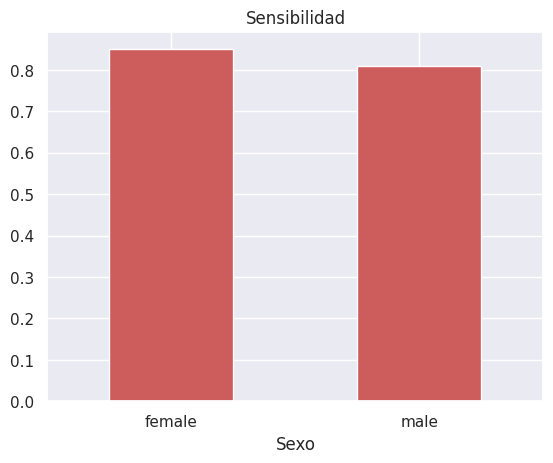

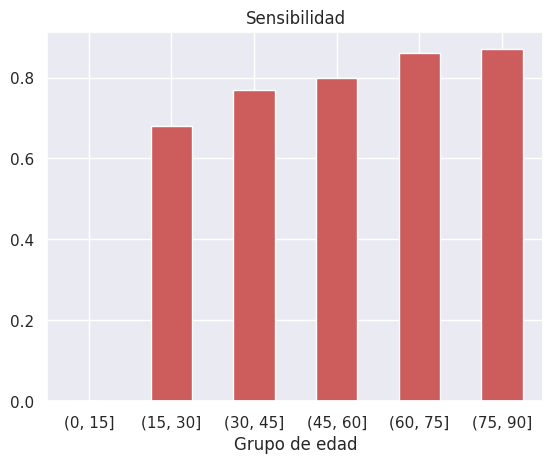

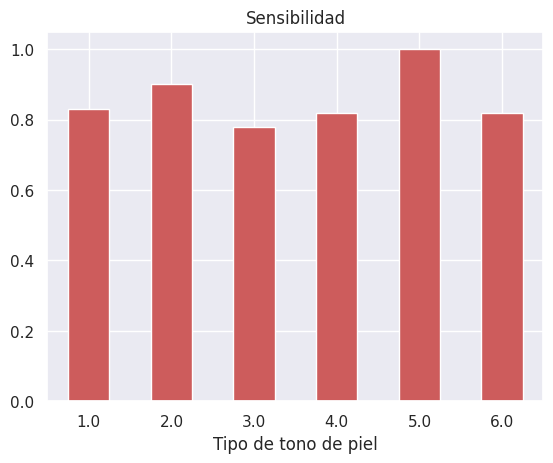

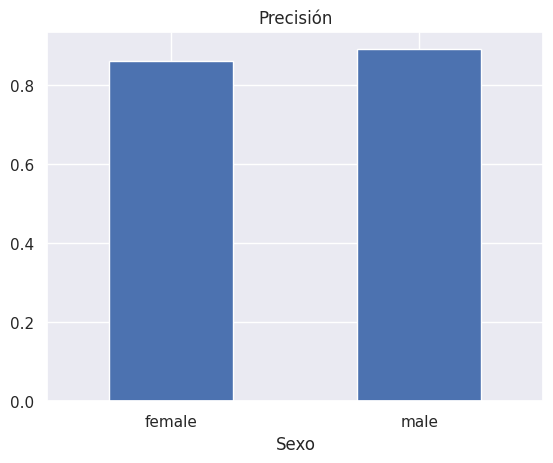

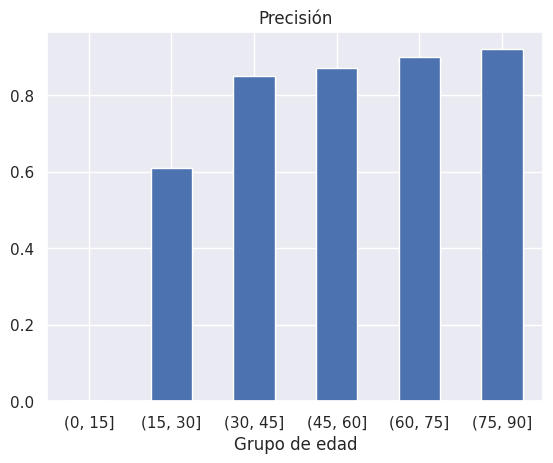

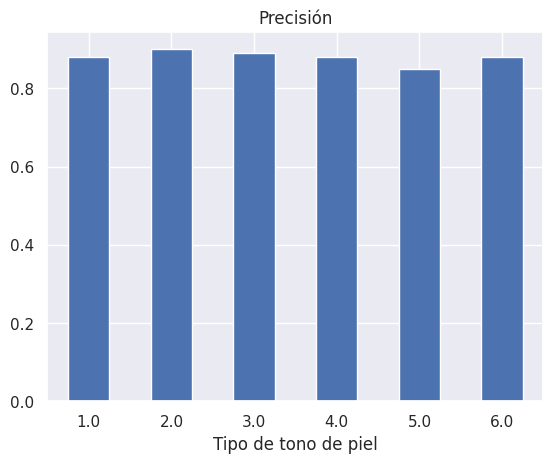

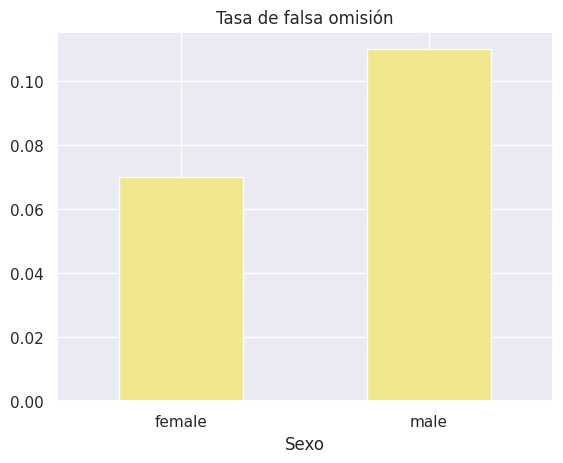

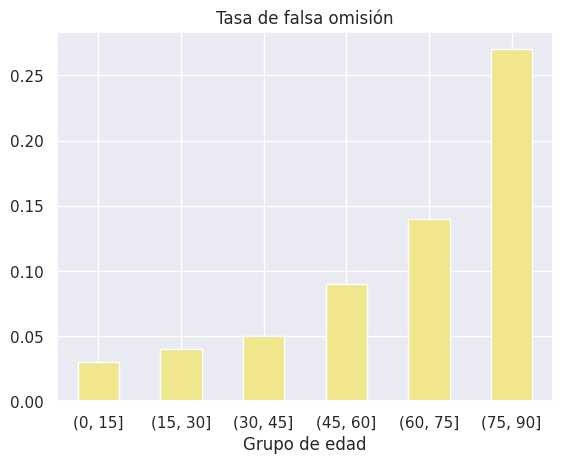

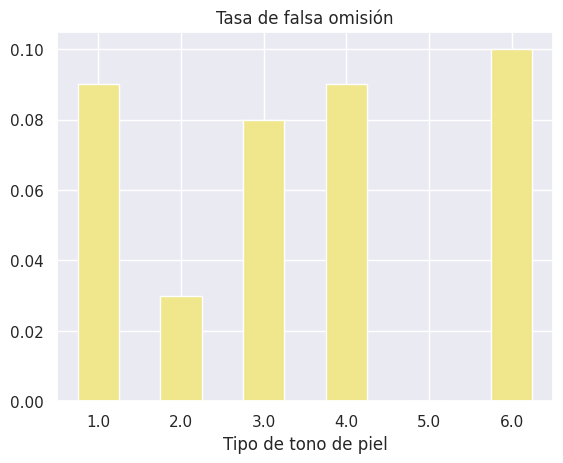

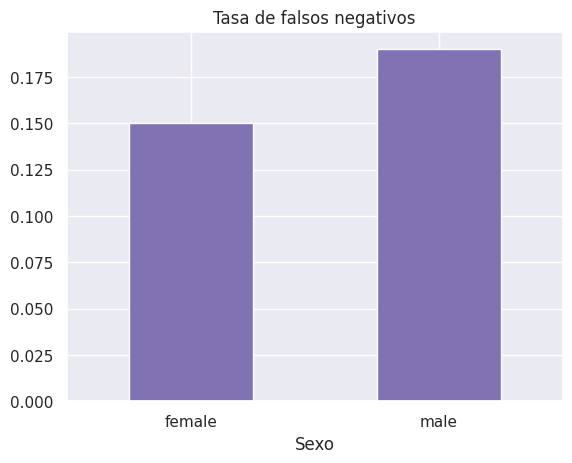

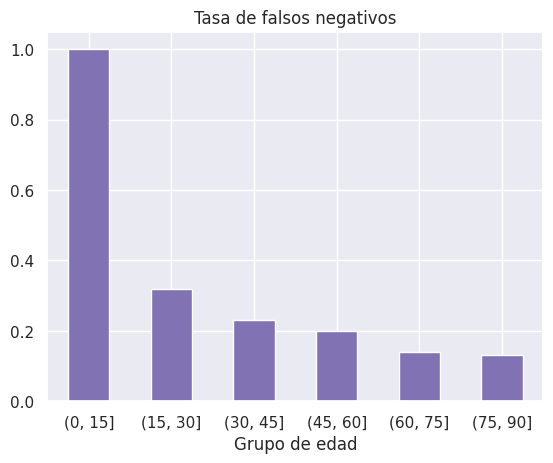

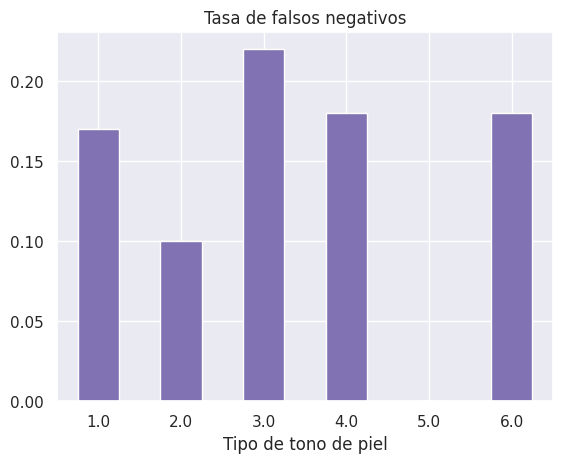

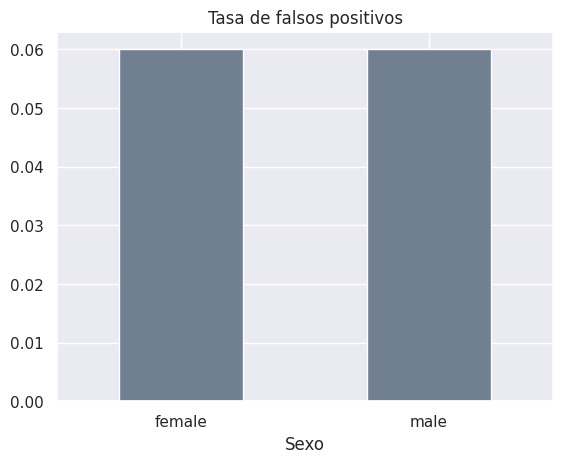

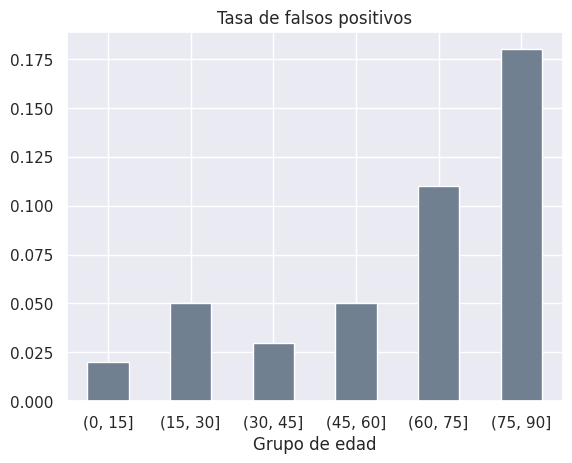

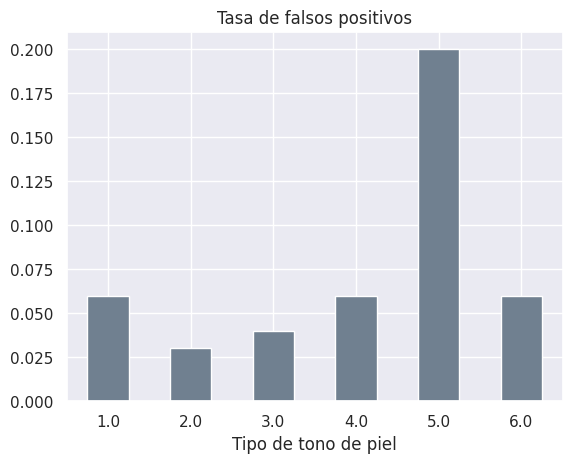

In [ ]:
# Representación gráfica
col_bars = {
    "sex": "Sexo",
    "age_group": "Grupo de edad",
    "ITA": "Tipo de tono de piel"
}

# Sensibilidad
for key, value in col_bars.items():
  ax = data_equity[data_equity['attribute_name'] == key][['attribute_value', 'tpr']]\
                                                    .plot.bar(x="attribute_value", y="tpr",
                                                              legend=None,
                                                              rot=0, color="indianred");
  ax.set_title("Sensibilidad")
  ax.set_xlabel(value);
  plt.show();


# Precisión
for key, value in col_bars.items():
  ax = data_equity[data_equity['attribute_name'] == key][['attribute_value', 'precision']]\
                                                    .plot.bar(x="attribute_value", y="precision",
                                                              legend=None,
                                                              rot=0);
  ax.set_title("Precisión")
  ax.set_xlabel(value);
  plt.show();

# Tasa de falsa omisión FOR
for key, value in col_bars.items():
  ax = data_equity[data_equity['attribute_name'] == key][['attribute_value', 'for']]\
                                                    .plot.bar(x="attribute_value", y="for",
                                                              legend=None,
                                                              rot=0, color="khaki");
  ax.set_title("Tasa de falsa omisión")
  ax.set_xlabel(value);
  plt.show();

# Tasa de falsos negativos FNR
for key, value in col_bars.items():
  ax = data_equity[data_equity['attribute_name'] == key][['attribute_value', 'fnr']]\
                                                    .plot.bar(x="attribute_value", y="fnr",
                                                              legend=None,
                                                              rot=0, color="m");
  ax.set_title("Tasa de falsos negativos")
  ax.set_xlabel(value);
  plt.show();

  # Tasa de falsos negativos FPR
for key, value in col_bars.items():
  ax = data_equity[data_equity['attribute_name'] == key][['attribute_value', 'fpr']]\
                                                    .plot.bar(x="attribute_value", y="fpr",
                                                              legend=None,
                                                              rot=0, color="slategrey");
  ax.set_title("Tasa de falsos positivos")
  ax.set_xlabel(value);
  plt.show();


Este notebook fue inspirado inspirado por: COMPAS Analysis using Aequitas. https://colab.research.google.com/github/dssg/aequitas/blob/update_compas_notebook/docs/source/examples/compas_demo.ipynb